# <center> LAb 6b: NCA, LDA and PCA with Kernels functions<br> Kernel Principal Components Analysis (KPCA)<br>Kernel Linear Discriminant Analysis(KLDA)<br> <small>Réda DEHAK<br> 25 june 2021</small> </center>

The goal of this lab is :

    - Reproduce the result of this scientific paper about NCA: 
[J. Goldberger, G. Hinton, S. Roweis, R. Salakhutdinov, "Neighbourhood Components Analysis", Advances in Neural Information Processing Systems, vol 17, pp. 513-520, 2005.](https://www.cs.toronto.edu/~hinton/absps/nca.pdf)
    
     - Test and use KPCA and KLDA:
[S. Mika, G. Rätsch,J. Weston,B. Schölkopf, KR. Müller, "Fisher discriminant analysis with kernels", Neural Networks for Signal Processing, vol IX. pp. 41–48, 1999.](https://doc.ml.tu-berlin.de/publications/publications/MikRaeWesSchMue99.pdf)
    
    
We will use the [optdigits dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/) from UCI. This database is a small set of handwritten digits compared to the MNIST databases. A preprocessing program available by NIST was used to extract 64 features which represent the number of on pixel of nonoverlapping blocks of 4x4 extracted from normalized image. [See](optdigits.names.txt) for more details.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def loadData(trainfile, testfile):
    trainfile = 'data/' + trainfile
    testfile = 'data/' + testfile
    dataTrain = pd.read_csv(trainfile, header=None)
    dataTest = pd.read_csv(testfile, header=None)

    X = dataTrain.values[:,0:-1]
    y = dataTrain.values[:,-1]

    Xtest = dataTest.values[:,0:-1]
    ytest = dataTest.values[:,-1]
    
    return(X, y, Xtest, ytest)

### Part 1: Neighborhood Components Analysis (NCA)

1- Load circles, wines, spiral and optdigits dataset

In [3]:
datawines = loadData('wine.tra', 'wine.tes')
datacircles = loadData('circles.tra', 'circles.tes')
dataspiral = loadData('spiral.tra', 'spiral.tes')
dataoptdigit = loadData('optdigits.tra', 'optdigits.tes')

In [4]:
Datas = [('Circles', datacircles), ('Wines', datawines),  ('Optdigits', dataoptdigit)]

In [5]:
for (named, data) in Datas:
    X_train, y_train, X_test, y_test = data
    print(named,X_train.shape, y_train.shape, X_test.shape, y_test.shape, len(np.unique(y_train)))

Circles (750, 2) (750,) (250, 2) (250,) 5
Wines (142, 13) (142,) (36, 13) (36,) 3
Optdigits (3823, 64) (3823,) (1797, 64) (1797,) 10


2- Train a KNN classifier on training data, and compute the performance on test data using different values of k.

In [6]:
from scipy.stats import mode
class KNN():
    def __init__(self, k):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self, X_test):
        neighbors = []
        for x in X_test:
            dist = np.linalg.norm(self.X_train - x, axis=1)
            k_inx = np.argsort(dist)[:self.k]
            k_labels = self.y_train[k_inx]
            neighbor = mode(k_labels).mode
            neighbors.append(neighbor)
        return np.array(neighbors)
        
    def score(self, X_test, y_test):
        y_pred = self.predict(X_test)
        return np.mean(y_pred == y_test)       

In [7]:
for k in range(1,6):
    for (named, data) in Datas:
        knn = KNN(k)
        X_train, y_train, X_test, y_test = data
        knn.fit(X_train, y_train)
        print(f"k = {k}, dataset = {named},accuracy ={knn.score(X_test, y_test):.2f}")

k = 1, dataset = Circles,accuracy =1.00
k = 1, dataset = Wines,accuracy =0.78
k = 1, dataset = Optdigits,accuracy =0.98
k = 2, dataset = Circles,accuracy =1.00
k = 2, dataset = Wines,accuracy =0.75
k = 2, dataset = Optdigits,accuracy =0.97
k = 3, dataset = Circles,accuracy =1.00
k = 3, dataset = Wines,accuracy =0.78
k = 3, dataset = Optdigits,accuracy =0.98
k = 4, dataset = Circles,accuracy =1.00
k = 4, dataset = Wines,accuracy =0.72
k = 4, dataset = Optdigits,accuracy =0.98
k = 5, dataset = Circles,accuracy =1.00
k = 5, dataset = Wines,accuracy =0.75
k = 5, dataset = Optdigits,accuracy =0.98


3- try to compare the result of PCA, LDA and NCA on these data. Plot the projection of test data using PCA, LDA and NCA into two first axis.

In [31]:
from sklearn.neighbors import (KNeighborsClassifier,
                               NeighborhoodComponentsAnalysis)
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

pca = PCA(n_components=2)
lda = LinearDiscriminantAnalysis(n_components=2)
nca = NeighborhoodComponentsAnalysis(n_components=2)
Classifiers = [('PCA', pca), ('LDA', lda), ('NCA', nca)]

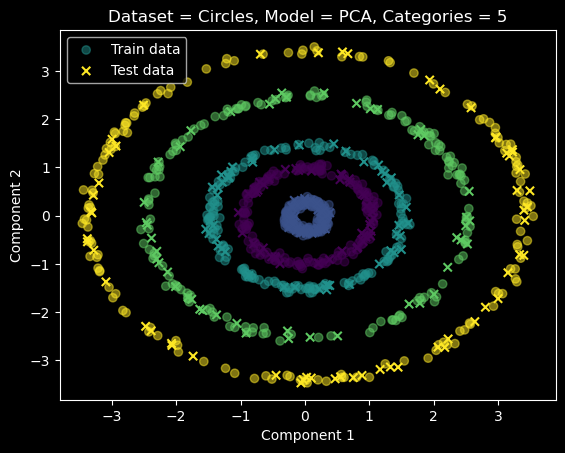

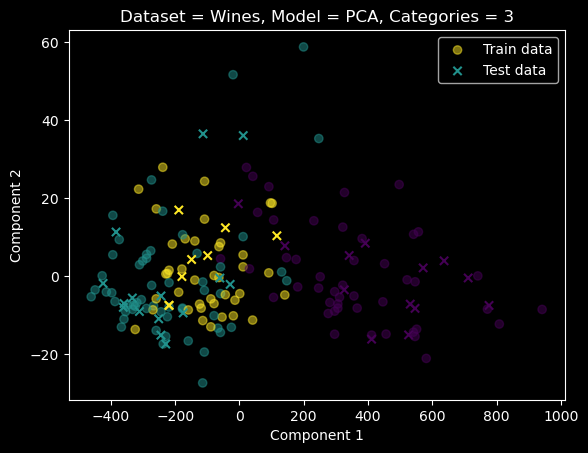

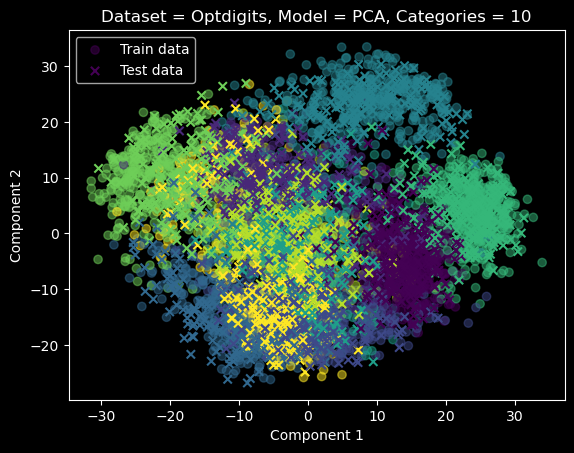

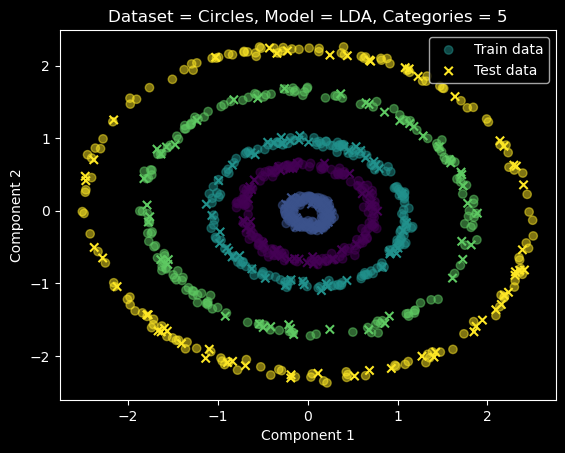

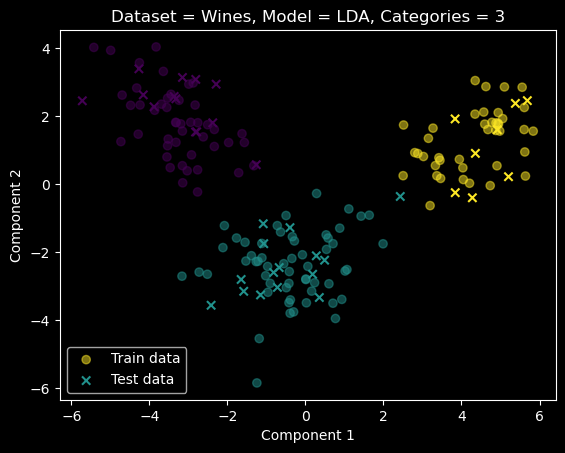

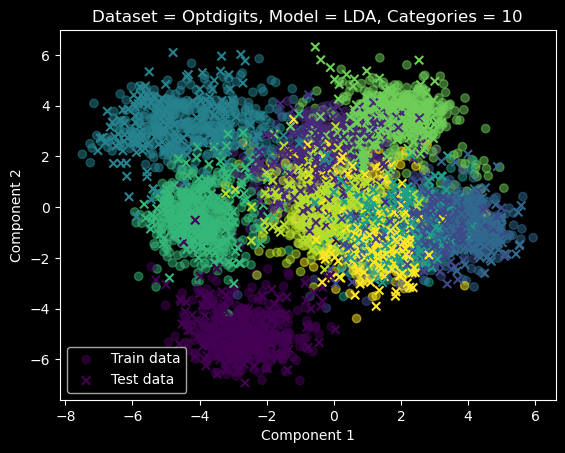

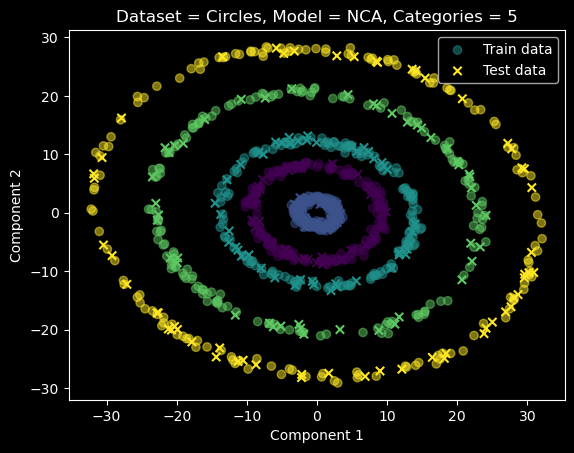

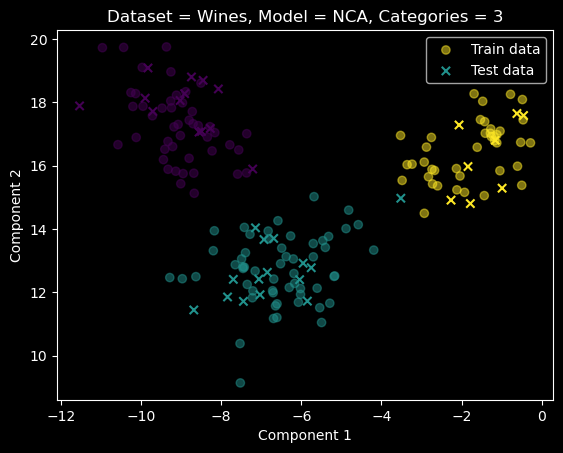

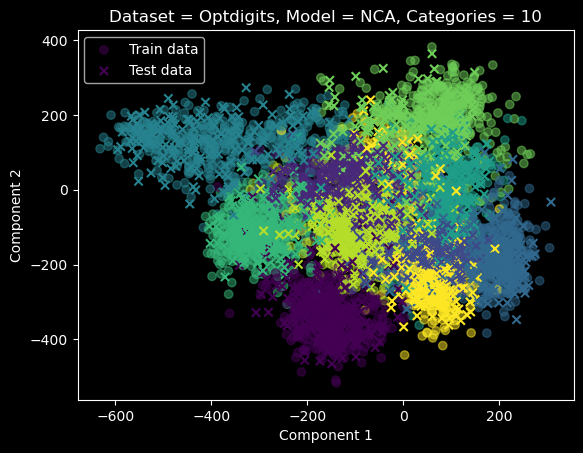

In [32]:
for name, model in Classifiers:
    for named, data in Datas:
        X_train, y_train, X_test, y_test = data
        model.fit(X_train, y_train)
        X_train_transformed = model.transform(X_train)
        X_test_transformed = model.transform(X_test)
        plt.figure()
        plt.scatter(X_train_transformed[:, 0], X_train_transformed[:, 1], c=y_train, alpha=0.5, marker='o', label='Train data')
        plt.scatter(X_test_transformed[:, 0], X_test_transformed[:, 1], c=y_test, marker='x', label='Test data')
   
        plt.title(f"Dataset = {named}, Model = {name}, Categories = {len(np.unique(y_train))}")
        plt.xlabel('Component 1')
        plt.ylabel('Component 2')
        plt.legend()
        plt.show()

4- Train a KNN classifier on training data, and compute the performance on test data using a PCA, LDA, NCA.

In [16]:
for i, (name, model) in enumerate(Classifiers):
    for (named, data) in Datas:
        #New Figure
        X_train, y_train, X_test, y_test = data
        X_train_transformed = model.fit_transform(X_train, y_train)
        X_test_transformed = model.transform(X_test)
        knn = KNeighborsClassifier(n_neighbors=1)
        knn.fit(X_train_transformed, y_train)
        print(f"Dataset = {named}, Model = {name}, Accuracy = {knn.score(X_test_transformed, y_test):.2f}")

        

Dataset = Circles, Model = PCA, Accuracy = 1.00
Dataset = Wines, Model = PCA, Accuracy = 0.75
Dataset = Optdigits, Model = PCA, Accuracy = 0.53
Dataset = Circles, Model = LDA, Accuracy = 1.00
Dataset = Wines, Model = LDA, Accuracy = 0.97
Dataset = Optdigits, Model = LDA, Accuracy = 0.59
Dataset = Circles, Model = NCA, Accuracy = 1.00
Dataset = Wines, Model = NCA, Accuracy = 0.97
Dataset = Optdigits, Model = NCA, Accuracy = 0.65


5- Conclude, How to improve the performances of these methods (show an example)?

### Part 2: Nolinear dimension reduction (Kernel Methods)

- Train a KPCA with linear kernel and compare the result to the classical PCA

In [59]:
from sklearn.metrics.pairwise import rbf_kernel, polynomial_kernel, linear_kernel
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=400, factor=.3, noise=.05)
X.shape, y.shape

((400, 2), (400,))

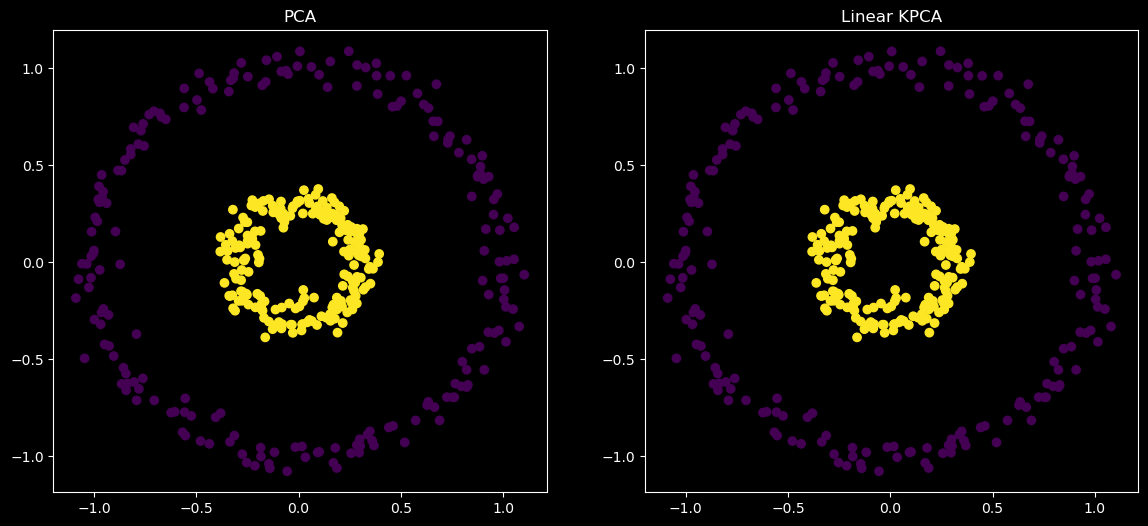

In [64]:
kpca = KernelPCA(n_components=2, kernel='linear')
pca = PCA(n_components=2)
X_Kpca = kpca.fit_transform(X)
X_pca = pca.fit_transform(X)
plt.figure(figsize=(14, 6))
plt.subplot(121)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y)
plt.title('PCA')
plt.subplot(122)
plt.scatter(X_Kpca[:,0], X_Kpca[:,1], c=y)
plt.title('Linear KPCA')
plt.show()



- Test the result with polynomial and RBF kernels

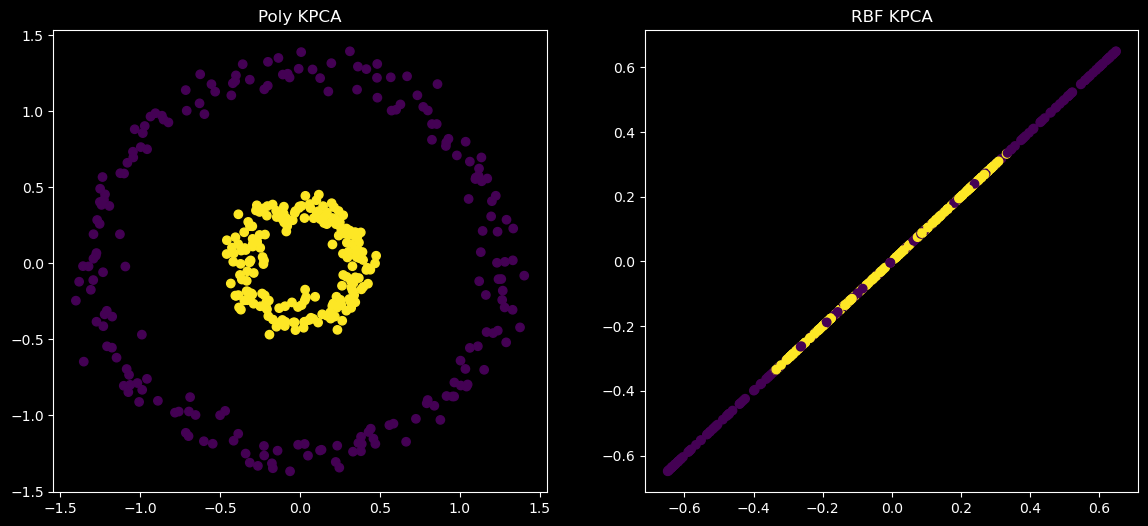

In [68]:
pkpca = KernelPCA(n_components=2, kernel='poly', degree=3)
rkpca = KernelPCA(n_components=2, kernel='rbf')
X_pKpca = pkpca.fit_transform(X)
X_rKpca = rkpca.fit_transform(X)
plt.figure(figsize=(14, 6))
plt.subplot(121)
plt.scatter(X_pKpca[:,0], X_pKpca[:,1], c=y)
plt.title('Poly KPCA')
plt.subplot(122)
plt.scatter(X_rKpca[:,1], X_rKpca[:,1], c=y)
plt.title('RBF KPCA')
plt.show()



- Write a function that fit a KLDA on the X dataset, use the kernel function as a parameter.

- Train a KLDA with linear kernel and compare the result to the classical LDA

- Try to use a KPCA of the optdigit data (use different kernel functions)
- Plot each example of the testing data in the first two factorial axis of PCA(2D space), use different color foreach classe? compare with the classical PCA, what did you conclude?

- Train a KNN on the projected data into the $d$ first factorial axis of KPCA, and test the performances on the testing data? try different values of $d$ and $k$?  

We will try a Kernel Linear Discriminant Analysis method to separate the 10 classes. Train a Kernel Linear Discriminant Analysis on the training data and plot each example in the 2d plan corresponding to the two axis with largest eigen values? what did you conclude? (use different kernel functions)

Train a KNN on the projected data into the $d$ first axis of KLDA and test the performances on the testing data? try different values of $d$ and $k$?

Compare the performances of the KNN with PCA, LDA, NCA, KPCA and KLDA?